#Regresión logística con Python


#Introducción


La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

A lo largo de este documento, se describen de forma progresiva los fundamentos teóricos de la regresión logística, los principales aspectos prácticos a tener en cuenta y ejemplos de cómo crear este tipo de modelos en Python.


#Modelos de regresión logística en Python

Dos de las implementaciones de modelos de regresión logística más utilizadas en Python son: `scikit-learn` y `statsmodels`. Aunque ambas están muy optimizadas, Scikit-learn está orientada principalmente a la predicción, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer inferencia. `Statsmodels` es más completa en este sentido.


#Ejemplo regresión logística simple


Un estudio quiere establecer un modelo que permita calcular la probabilidad de obtener matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. La variable matrícula está codificada como 0 si no se tiene matrícula y 1 si se tiene.

#Librerías


Las librerías utilizadas en este ejemplo son:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Datos
Un estudio quiere establecer un modelo que permita calcular la probabilidad de obtener matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. La variable matrícula está codificada como 0 si no se tiene matrícula y 1 si se tiene

In [ ]:
# Datos
# ==============================================================================
matricula = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
                     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                     1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
                     1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
                     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
                     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
                     0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

matematicas = np.array([
                  41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43,
                  51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64,
                  63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70,
                  63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41,
                  50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54,
                  57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61,
                  72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41,
                  57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54,
                  56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48,
                  58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67,
                  53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65,
                  63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42,
                  53, 42, 60, 52, 38, 57, 58, 65])

datos = pd.DataFrame({'matricula': matricula, 'matematicas': matematicas})
datos

,matricula,matematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57
...,...,...
195,0,52
196,0,38
197,0,57
198,1,58


#Exploración gráfica


El primer paso antes de generar un modelo de regresión logística simple es representar los datos para poder intuir si existe una relación entre la variable independiente y la variable respuesta.

In [ ]:
# Número de obsercaciones por clase
# ==============================================================================
datos.matricula.value_counts().sort_index()

matricula
0    151
1     49
Name: count, dtype: int64

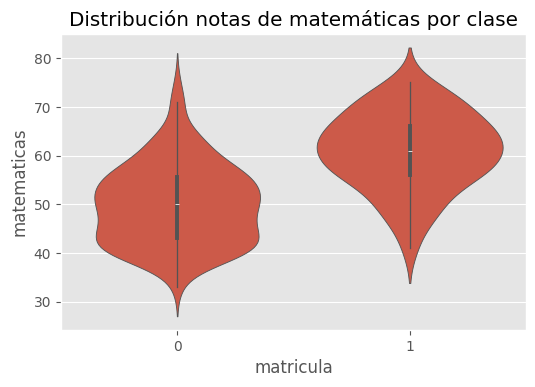

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'matricula',
        y     = 'matematicas',
        data  = datos,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución notas de matemáticas por clase');

In [ ]:
# T-test entre clases
# ==============================================================================
res_ttest = ttest_ind(
                x1 = matematicas[matricula == 0],
                x2 = matematicas[matricula == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-8.245421127756739, p-value=2.248243794123437e-14


Tanto el gráfico como el t-test muestran evidencias de que existe una diferencia entre la nota de las personas con matrícula y sin matrícula. Esta información es útil para considerar la nota de matemáticas como un buen predictor para el modelo.


#Ajuste del modelo


Se ajusta un modelo empleando como variable respuesta `matricula` y como predictor `matematicas`. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 7,
                                        )

# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LogisticRegression(penalty='none')

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento y testeo:", modelo.score(X, y))
print("Accuracy de entrenamiento:", modelo.score(X_train, y_train))
print("Accuracy de testeo:", modelo.score(X_test, y_test))

Intercept: [-8.94577097]
Coeficiente: [('matematicas', 0.13923392013854943)]
Accuracy de entrenamiento y testeo: 0.81
Accuracy de entrenamiento: 0.8071428571428572
Accuracy de testeo: 0.8166666666666667


Una vez entrenado el modelo, se pueden predecir nuevas observaciones.

In [ ]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = modelo.predict_proba(X = [X_test[0]])
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones

,0,1
0,0.86352,0.13648


In [ ]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = modelo.predict(X = X_test)
predicciones

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

#Statsmodels
La implementación de regresión logística de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

- Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

- Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['matematicas']]
y = datos['matricula']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)),
#                            columns=['matematicas', 'matricula'])
# modelo = smf.logit(formula = 'matricula ~matematicas', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.451215
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  160
Model:                          Logit   Df Residuals:                      158
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                  0.2247
Time:                        00:10:43   Log-Likelihood:                -72.194
converged:                       True   LL-Null:                       -93.122
Covariance Type:            nonrobust   LLR p-value:                 9.831e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9848      1.543     -5.821      0.000     -12.010      -5.960
x1             0.1439      0.

#Intervalos de confianza de los coeficientes

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
0,-12.009997,-5.959608
1,0.091564,0.196301


#Predicciones


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de regresión logística de statsmodels devuelven la probabilidad de pertenecer a la clase de referencia.

In [ ]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
predicciones[:4]

array([0.0437907 , 0.52073   , 0.05755755, 0.72042378])

Para obtener la clasificación final, se convierten los valores de probabilidad mayores de 0.5 a 1 y los mejores a 0.

In [ ]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.9, 0, 1)
clasificacion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

#Representación gráfica del modelo


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

In [ ]:
# Predicciones en todo el rango de X
# ==============================================================================
# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(
            start = min(datos.matematicas),
            stop  = max(datos.matematicas),
            num   = 200
         ).reshape(-1,1)

grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)

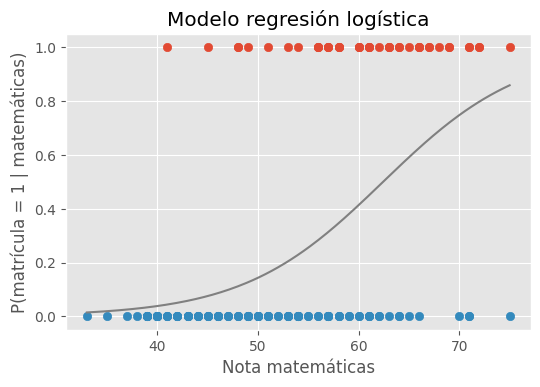

In [ ]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(y_train == 1).flatten(), 1],
    y_train[(y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(y_train == 0).flatten(), 1],
    y_train[(y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(matrícula = 1 | matemáticas)")
ax.set_xlabel("Nota matemáticas");

#Accuracy de test


Se calcula el porcentaje de aciertos que tiene el modelo al predecir las observaciones de test (accuracy).

#Ejemplo regresión logística múltiple


El set de datos spam, obtenido de UCI Repository Of Machine Learning Databases contiene información sobre 4601 correos electrónicos clasificados como spam y no spam.

Para cada correo electrónico se dispone de 58 variables: las 48 primeras contienen la frecuencia con la que aparecen en el texto del email determinadas palabras. Las variables 49-54 indican la frecuencia con la que aparecen los caracteres ;’, ‘(’, ‘[’, ‘!’, ‘$’, ‘#’. Las variables 55-57 contienen la media, a longitud máxima y el número total de letras mayúsculas.

Se crea un modelo de regresión logística con el objetivo de clasificar si un correo es spam o no.

#Librerías


Las librerías utilizadas en este ejemplo son:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

#Datos

In [ ]:
# Datos
# ==============================================================================
url = r'spam.csv'
datos = pd.read_csv(url)

In [ ]:
datos.head(3)

Se codifica la variable respuesta como 1 si es spam y 0 si no lo es, y se identifica cuantas observaciones hay de cada clase.

In [ ]:
datos['type'] = np.where(datos['type'] == 'spam', 1, 0)

print("Número de observaciones por clase")
print(datos['type'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * datos['type'].value_counts(normalize=True))

El 66.6% de los correos no son spam y el 39.4% sí lo son. Un modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones por encima del porcentaje de la clase mayoritaria. En este caso, el umbral de referencia que se tiene que superar es del 66.6%.

#Ajuste del modelo


Se ajusta un modelo de regresión logística múltiple con el objetivo de predecir si un correo es spam en función de todas las variables disponibles.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'type')
y = datos['type']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

#Predicciones


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [ ]:
# Predicciones con intervalo de confianza
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

#Accuracy de test


Se calcula el porcentaje de aciertos que tiene el modelo al predecir las observaciones de test (accuracy).

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")

In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix